## Divisive Hierarchical Clustering

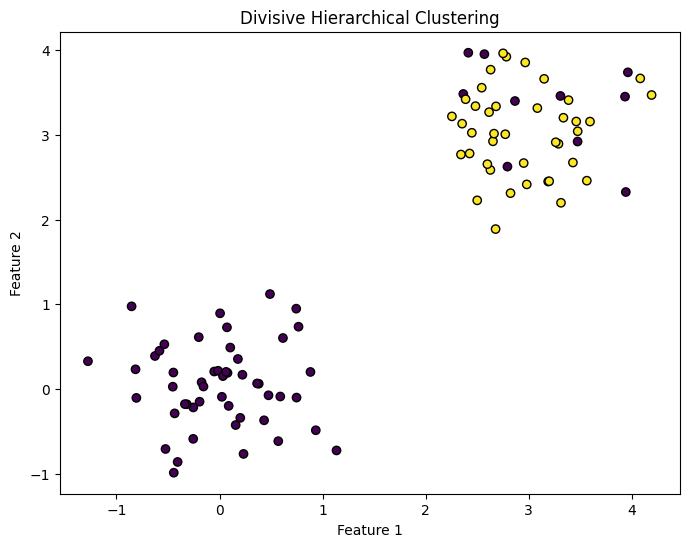

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

class DivisiveHierarchicalClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.labels = None

    def fit(self, X):
        # Start with one cluster containing all the data
        clusters = [X]
        while len(clusters) < self.n_clusters:
            # Find the cluster with the largest variance
            variances = [np.var(cluster, axis=0).sum() for cluster in clusters]
            max_variance_index = np.argmax(variances)
            cluster_to_split = clusters[max_variance_index]

            # Compute pairwise distances and find the split
            pairwise_distances = pdist(cluster_to_split)
            linkage_matrix = linkage(pairwise_distances, method='ward')

            # Split the cluster into two subclusters
            new_clusters = self._split_cluster(cluster_to_split, linkage_matrix)

            # Replace the old cluster with the two new clusters
            clusters.pop(max_variance_index)
            clusters.extend(new_clusters)

        self.labels = self._assign_labels(X, clusters)

    def _split_cluster(self, cluster, linkage_matrix):
        # Perform a simple cut to divide the cluster into two subclusters
        # Using the first two entries in the linkage matrix for simplicity
        return np.split(cluster, [int(linkage_matrix[0, 0])])

    def _assign_labels(self, X, clusters):
        labels = np.empty(X.shape[0], dtype=int)
        for cluster_index, cluster in enumerate(clusters):
            for point in cluster:
                labels[np.all(X == point, axis=1)] = cluster_index
        return labels

    def get_labels(self):
        return self.labels

# Generate sample data
def generate_data(n_samples=100):
    """Generate synthetic data for clustering."""
    np.random.seed(0)
    cluster_1 = np.random.normal(loc=0, scale=0.5, size=(n_samples // 2, 2))
    cluster_2 = np.random.normal(loc=3, scale=0.5, size=(n_samples // 2, 2))
    return np.vstack((cluster_1, cluster_2))

# Plotting function for clusters
def plot_clusters(X, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title('Divisive Hierarchical Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage
if __name__ == "__main__":
    X = generate_data(n_samples=100)
    div_hc = DivisiveHierarchicalClustering(n_clusters=2)
    div_hc.fit(X)
    labels = div_hc.get_labels()
    plot_clusters(X, labels)
